# SVM using sklearn


## Imports

In [53]:
import numpy as np
from sklearn import svm

## Training models and plotting results

In [54]:
def prepare_data(x):
    return [xi + [1] for xi in x]

def train_svm(x_train, y_train):
    from sklearn import svm
    clf = svm.SVC(kernel='linear')
    clf.fit(x_train, y_train)
    return clf

def plot_svm(x_train, y_train, support_vectors, line_coords=None):
    import numpy as np
    import matplotlib.pyplot as plt
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_pos = x_train[y_train == 1]
    x_neg = x_train[y_train == -1]
    plt.scatter(x_pos[:, 0], x_pos[:, 1], color='red')
    plt.scatter(x_neg[:, 0], x_neg[:, 1], color='blue')
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')
    if line_coords is not None:
        lx, ly = line_coords
        plt.plot(lx, ly, color='green')
    plt.xlim([0, 45])
    plt.ylim([0, 75])
    plt.ylabel("length")
    plt.xlabel("width")
    plt.grid(True)
    plt.show()

## Linear SVM

[ 0.24431486 -0.13072144  0.00635516]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


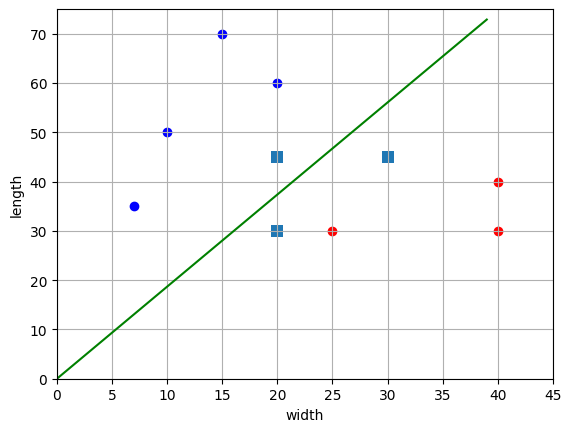

In [55]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = prepare_data(x_train)
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = train_svm(x_train, y_train)

lin_clf = svm.LinearSVC()
lin_clf.fit(x_train, y_train)
w = lin_clf.coef_[0]
print(w)
v = clf.support_vectors_
print(v)

line_x = list(range(max([pt[0] for pt in x_train])))
line_y = [-x * w[0] / w[1] - w[2] for x in line_x]

plot_svm(x_train, y_train, v, line_coords=(line_x, line_y))


## Nonlinear SVM

[-2  2  0  0  0  0  0  0  0  0  0  0]
[[30. 10.  1.]
 [20. 60.  1.]
 [20. 45.  1.]
 [ 7. 35.  1.]
 [15. 50.  1.]
 [20. 30.  1.]
 [25. 30.  1.]
 [30. 45.  1.]]


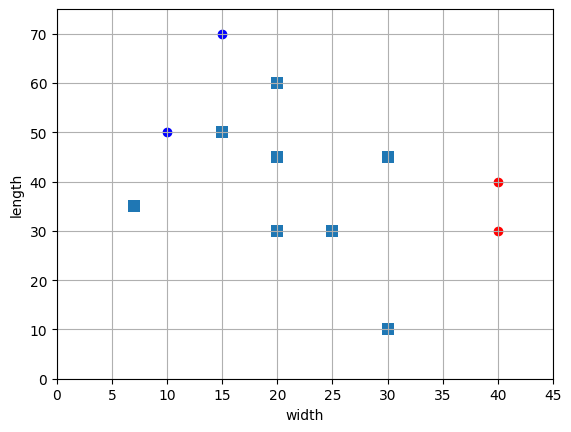

In [56]:
x_train = [[30, 10], [15, 50], [10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = prepare_data(x_train)
y_train = [-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = train_svm(x_train, y_train)
y_pr = clf.predict(x_train)
print(np.array(y_train) - np.array(y_pr))
v = clf.support_vectors_
print(v)

plot_svm(x_train, y_train, v)
